## Aprendizaje Supervisado

### 1.0 Limpieza de datos

Leer el conjunto de datos a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('../db/futbolistas.xlsx')
data

,Id,Nombre,Liga,Prácticas,Horas_Entrenando,Altura,Precio,Juegos,Gimnasio,Fuma,Nacimiento,Nutriólogo,Horas_Casa
0,1,Jugador 1,2,2,19,1.786613,1.865358e+06,32,No,No,1998-04-12,Sí,10
1,2,Jugador 2,2,5,9,1.832683,6.359627e+05,19,Sí,Sí,2002-08-12,No,8
2,3,Jugador 3,2,2,7,1.697480,4.486174e+05,12,Sí,No,1997-05-16,No,7
3,4,Jugador 4,3,7,9,1.762276,6.065402e+05,19,No,Sí,1997-04-07,Sí,10
4,5,Jugador 5,1,3,7,1.862030,5.048294e+05,0,No,No,1990-09-07,Sí,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Jugador 396,1,1,5,1.643050,4.042244e+05,13,Sí,No,2003-06-19,No,9
396,397,Jugador 397,1,2,12,1.647597,1.141293e+06,32,No,Sí,1992-02-19,Sí,5
397,398,Jugador 398,2,2,8,1.933087,4.345262e+05,27,No,No,1997-08-15,No,6
398,399,Jugador 399,1,3,16,1.881211,1.321241e+06,6,No,Sí,1996-05-14,No,14


Obtén el tamaño del dataset

In [2]:
data.shape

(400, 13)

Calcular el numero de datos unicos

In [3]:
data.nunique()

Id                  400
Nombre              400
Liga                  3
Prácticas             7
Horas_Entrenando     15
Altura              400
Precio              400
Juegos               40
Gimnasio              2
Fuma                  2
Nacimiento          379
Nutriólogo            2
Horas_Casa           10
dtype: int64

Enlistar la informacion de tipo de variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                400 non-null    int64         
 1   Nombre            400 non-null    object        
 2   Liga              400 non-null    int64         
 3   Prácticas         400 non-null    int64         
 4   Horas_Entrenando  400 non-null    int64         
 5   Altura            400 non-null    float64       
 6   Precio            400 non-null    float64       
 7   Juegos            400 non-null    int64         
 8   Gimnasio          400 non-null    object        
 9   Fuma              400 non-null    object        
 10  Nacimiento        400 non-null    datetime64[ns]
 11  Nutriólogo        400 non-null    object        
 12  Horas_Casa        400 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 40.8+ KB


Calcular la cantidad de numeros nulos en cada columna

In [5]:
data.isnull().sum()

Id                  0
Nombre              0
Liga                0
Prácticas           0
Horas_Entrenando    0
Altura              0
Precio              0
Juegos              0
Gimnasio            0
Fuma                0
Nacimiento          0
Nutriólogo          0
Horas_Casa          0
dtype: int64

Obtener las caracteristicas estadisticas

In [6]:
data.describe()
# esto es para ver la media, desviación estándar, mínimo, máximo, de cada columna.

,Id,Liga,Prácticas,Horas_Entrenando,Altura,Precio,Juegos,Nacimiento,Horas_Casa
count,400.000000,400.00000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400,400.000000
mean,200.500000,2.01250,3.957500,11.900000,1.768063,9.790910e+05,19.745000,1997-03-10 02:09:36,9.455000
min,1.000000,1.00000,1.000000,5.000000,1.602523,1.844537e+05,0.000000,1990-01-09 00:00:00,5.000000
25%,100.750000,1.00000,2.000000,8.000000,1.680097,6.731501e+05,10.000000,1993-05-06 18:00:00,7.000000
50%,200.500000,2.00000,4.000000,12.000000,1.765149,9.587607e+05,19.000000,1997-06-08 00:00:00,9.000000
75%,300.250000,3.00000,6.000000,15.000000,1.847624,1.228998e+06,30.000000,2001-04-02 06:00:00,12.000000
max,400.000000,3.00000,7.000000,19.000000,1.949800,2.130293e+06,39.000000,2003-12-26 00:00:00,14.000000
std,115.614301,0.82404,1.976223,4.208239,0.097607,3.765770e+05,11.244379,NaN,2.929065


#### Limpieza de datos

##### Columnas que tienen que ser eliminadas

##### Por valores Unicos
- Nacimiento
- Altura
- Nombre

---

##### Por falta de logica
- Horas_Casa
- Id No se necesita, tenemos el index

In [7]:
# Eliminación de columnas innecesarias
data_clean = data.drop(
    ['Nacimiento', 'Altura', 'Nombre', 'Horas_Casa', 'Id'], axis=1)
data_clean.shape

(400, 8)

### 1.1 Transformación de variables categóricas

In [8]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Liga              400 non-null    int64  
 1   Prácticas         400 non-null    int64  
 2   Horas_Entrenando  400 non-null    int64  
 3   Precio            400 non-null    float64
 4   Juegos            400 non-null    int64  
 5   Gimnasio          400 non-null    object 
 6   Fuma              400 non-null    object 
 7   Nutriólogo        400 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 25.1+ KB


Based on the `data_clean.info()` output, the categorical variables are:

- Gimnasio: (dtype object)
- Fuma: (dtype object)
- Nutriólogo: (dtype object)

> These columns likely contain string values representing categories (e.g., "Yes" or "No", or perhaps different gym names)

Estas variables no las puedo meter a un modelo de regresión lineal, por lo tanto las tengo que transformar a numéricas, en este caso a binarias (0 y 1).

In [9]:
categoricos = data_clean.select_dtypes(include=['object']).columns
categoricos

Index(['Gimnasio', 'Fuma', 'Nutriólogo'], dtype='object')

In [10]:
lista_categoricos = list(categoricos)
lista_categoricos

['Gimnasio', 'Fuma', 'Nutriólogo']

Convierte los datos string en numericos introduciendo variables `dummy` para los atributos de sexo y puerto de embarque

In [11]:
# Convert categorical columns to dummy variables with integer type
data_trans = pd.get_dummies(
    data_clean,
    columns=lista_categoricos,
    drop_first=True,
    dtype=int  # Add this parameter
)
data_trans

,Liga,Prácticas,Horas_Entrenando,Precio,Juegos,Gimnasio_Sí,Fuma_Sí,Nutriólogo_Sí
0,2,2,19,1.865358e+06,32,0,0,1
1,2,5,9,6.359627e+05,19,1,1,0
2,2,2,7,4.486174e+05,12,1,0,0
3,3,7,9,6.065402e+05,19,0,1,1
4,1,3,7,5.048294e+05,0,0,0,1
...,...,...,...,...,...,...,...,...
395,1,1,5,4.042244e+05,13,1,0,0
396,1,2,12,1.141293e+06,32,0,1,1
397,2,2,8,4.345262e+05,27,0,0,0
398,1,3,16,1.321241e+06,6,0,1,0


Comprobar que las categóricas ahora son numéricas

In [12]:
data_trans.info()
# Todo debe ser int64 o float64, pero no objetos como en data_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Liga              400 non-null    int64  
 1   Prácticas         400 non-null    int64  
 2   Horas_Entrenando  400 non-null    int64  
 3   Precio            400 non-null    float64
 4   Juegos            400 non-null    int64  
 5   Gimnasio_Sí       400 non-null    int64  
 6   Fuma_Sí           400 non-null    int64  
 7   Nutriólogo_Sí     400 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 25.1 KB


#### Scikit Learn 📈🧡

Te da las herramientas para crear modelos que aprenden de datos, como modelos para predecir cosas (regresión), clasificar elementos en categorías, agrupar datos similares (clustering) y reducir la cantidad de información sin perder lo importante

> Objetivo: Queremos a predecir el precio del futbolista a partir de los datos que tenemos

Normaliza los datos utilizando el escalador de datos

In [13]:
# El modelo no puede recibir datos que estén tan lejos unos de otros, por tanto hay q normalizarlos

# Normalizar los datos con sklearn

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# son 3 escaladores que nos van a servir para hacer nuestro escalado

In [14]:
# generar el objeto que se va a dedicar a normalizar los datos, no esta ajustado (Not fitted)
dataScaler = RobustScaler()
dataScaler

RobustScaler()

In [15]:
# ajustar (fit) dataScaler a los datos de data_trans
scaler = dataScaler.fit(data_trans)
scaler  # objeto ajustado (fitted) listo para normalizar

RobustScaler()

In [16]:
dataScaled = scaler.transform(data_trans)
dataScaled  # arreglo de numpy normalizado

array([[ 0.        , -0.5       ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.25      , -0.42857143, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.        , -0.5       , -0.71428571, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.5       , -0.57142857, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5       , -0.25      ,  0.57142857, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5       ,  0.        ,  0.85714286, ...,  0.        ,
         1.        ,  0.        ]], shape=(400, 8))

Crea un dataframe con los datos normalizados

In [17]:
data_f = pd.DataFrame(dataScaled)
data_f

,0,1,2,3,4,5,6,7
0,0.0,-0.50,1.000000,1.631019,0.65,0.0,0.0,1.0
1,0.0,0.25,-0.428571,-0.580731,0.00,1.0,1.0,0.0
2,0.0,-0.50,-0.714286,-0.917776,-0.35,1.0,0.0,0.0
3,0.5,0.75,-0.428571,-0.633664,0.00,0.0,1.0,1.0
4,-0.5,-0.25,-0.714286,-0.816647,-0.95,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
395,-0.5,-0.75,-1.000000,-0.997641,-0.30,1.0,0.0,0.0
396,-0.5,-0.50,0.000000,0.328385,0.65,0.0,1.0,1.0
397,0.0,-0.50,-0.571429,-0.943127,0.40,0.0,0.0,0.0
398,-0.5,-0.25,0.571429,0.652121,-0.65,0.0,1.0,0.0


In [18]:
# pone el nombre a las columns que se perdió en la normalización
data_f.columns = data_trans.columns
data_f

,Liga,Prácticas,Horas_Entrenando,Precio,Juegos,Gimnasio_Sí,Fuma_Sí,Nutriólogo_Sí
0,0.0,-0.50,1.000000,1.631019,0.65,0.0,0.0,1.0
1,0.0,0.25,-0.428571,-0.580731,0.00,1.0,1.0,0.0
2,0.0,-0.50,-0.714286,-0.917776,-0.35,1.0,0.0,0.0
3,0.5,0.75,-0.428571,-0.633664,0.00,0.0,1.0,1.0
4,-0.5,-0.25,-0.714286,-0.816647,-0.95,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
395,-0.5,-0.75,-1.000000,-0.997641,-0.30,1.0,0.0,0.0
396,-0.5,-0.50,0.000000,0.328385,0.65,0.0,1.0,1.0
397,0.0,-0.50,-0.571429,-0.943127,0.40,0.0,0.0,0.0
398,-0.5,-0.25,0.571429,0.652121,-0.65,0.0,1.0,0.0


In [19]:
data_f.describe()
# los datos se encuentran normalizados en valores centrados

,Liga,Prácticas,Horas_Entrenando,Precio,Juegos,Gimnasio_Sí,Fuma_Sí,Nutriólogo_Sí
count,400.00000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,0.00625,-0.010625,-0.014286,3.657524e-02,0.037250,0.470000,0.495000,0.462500
std,0.41202,0.494056,0.601177,6.774827e-01,0.562219,0.499724,0.500601,0.499216
min,-0.50000,-0.750000,-1.000000,-1.393021e+00,-0.950000,0.000000,0.000000,0.000000
25%,-0.50000,-0.500000,-0.571429,-5.138291e-01,-0.450000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,1.047339e-16,0.000000,0.000000,0.000000,0.000000
75%,0.50000,0.500000,0.428571,4.861709e-01,0.550000,1.000000,1.000000,1.000000
max,0.50000,0.750000,1.000000,2.107651e+00,1.000000,1.000000,1.000000,1.000000


### 1.2 Partición de datos

Dividir el conjunto de datos en los conjuntos de entrenamiento(60%), validación(20%) y prueba (20%)

- **Datos de Entrenamiento**: Son con los que vamos a alimentar el modelo para que luego pueda da predecir con los datos de validación y prueba.

- **Datos de Validación**: Para verificar que tan eficiente es el modelo, es decir, que tan bien esta aprendiendo.

- **Datos de Prueba**: Es la evaluación final con datos que el modelo nunca ha visto.

> Nunca podemos evaluar un modelo con los mismos datos de entrenamiento porque le va a ir perfecto.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Separando los datos

train_val_df, test_df = train_test_split(
    data_f, test_size=0.2, random_state=23)
# parte el data_f en 20% y los toma para Datos de Prueba (test_df) y los otros 80% para Datos de Entrenamiento (train_val_df).

# random_state es una semilla base 23 para que tome los datos específicos y reproducibles en otros tests.

In [22]:
train_val_df  # 80% de los datos para entrenamiento tomados aleatoriamente en semilla base 23

,Liga,Prácticas,Horas_Entrenando,Precio,Juegos,Gimnasio_Sí,Fuma_Sí,Nutriólogo_Sí
353,0.0,0.75,-0.714286,-1.050800,0.15,1.0,1.0,0.0
203,-0.5,0.50,-0.285714,-0.678064,0.40,0.0,1.0,0.0
188,-0.5,-0.75,0.428571,0.519710,-0.25,0.0,0.0,0.0
368,0.5,0.00,-0.142857,-0.234235,0.60,0.0,0.0,1.0
46,0.0,0.75,-0.714286,-0.620101,-0.55,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
237,0.0,0.25,-0.428571,0.004144,0.10,1.0,0.0,1.0
31,0.0,-0.75,-0.714286,-0.535425,-0.35,0.0,1.0,0.0
40,0.0,0.50,-0.714286,-0.738598,1.00,0.0,0.0,0.0
230,-0.5,0.50,1.000000,0.449745,-0.55,0.0,0.0,0.0


In [23]:
test_df  # 20% de los datos para prueba tomados aleatoriamente en semilla base 23

,Liga,Prácticas,Horas_Entrenando,Precio,Juegos,Gimnasio_Sí,Fuma_Sí,Nutriólogo_Sí
133,-0.5,0.50,0.285714,0.046370,-0.90,0.0,0.0,1.0
331,0.5,0.50,0.142857,0.656818,-0.10,1.0,0.0,0.0
167,0.5,-0.75,0.142857,0.269135,-0.15,1.0,1.0,1.0
335,0.0,0.75,-0.142857,-0.118641,0.55,0.0,0.0,0.0
239,-0.5,-0.25,0.857143,1.211599,-0.45,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
155,0.0,0.50,0.285714,0.319082,-0.50,1.0,1.0,1.0
74,0.0,-0.75,-0.571429,-0.275844,0.60,0.0,1.0,0.0
270,0.5,-0.75,-0.571429,-0.340150,-0.95,1.0,0.0,0.0
216,-0.5,0.50,0.571429,0.059586,-0.10,0.0,0.0,1.0


Separar las variables independientes (estadísticas del jugador) de la variable dependiente (Precio)

In [24]:
x_train, y_train = train_val_df.drop(
    columns=['Precio'], axis=1), train_val_df['Precio']
# x_train va a ser todas las columnas menos 'Precio' (variables independientes)
# y_train va a ser solamente la columna 'Precio' (variable dependiente)

In [25]:
x_train

,Liga,Prácticas,Horas_Entrenando,Juegos,Gimnasio_Sí,Fuma_Sí,Nutriólogo_Sí
353,0.0,0.75,-0.714286,0.15,1.0,1.0,0.0
203,-0.5,0.50,-0.285714,0.40,0.0,1.0,0.0
188,-0.5,-0.75,0.428571,-0.25,0.0,0.0,0.0
368,0.5,0.00,-0.142857,0.60,0.0,0.0,1.0
46,0.0,0.75,-0.714286,-0.55,0.0,1.0,0.0
...,...,...,...,...,...,...,...
237,0.0,0.25,-0.428571,0.10,1.0,0.0,1.0
31,0.0,-0.75,-0.714286,-0.35,0.0,1.0,0.0
40,0.0,0.50,-0.714286,1.00,0.0,0.0,0.0
230,-0.5,0.50,1.000000,-0.55,0.0,0.0,0.0


In [26]:
y_train

353   -1.050800
203   -0.678064
188    0.519710
368   -0.234235
46    -0.620101
         ...   
237    0.004144
31    -0.535425
40    -0.738598
230    0.449745
83     0.021173
Name: Precio, Length: 320, dtype: float64

In [27]:
x_test, y_test = test_df.drop(columns=['Precio'], axis=1), test_df['Precio']
# x_test va a ser todas las columnas menos 'Precio' (variables independientes)
# y_test va a ser solamente la columna 'Precio' (variable dependiente)

In [28]:
x_test

,Liga,Prácticas,Horas_Entrenando,Juegos,Gimnasio_Sí,Fuma_Sí,Nutriólogo_Sí
133,-0.5,0.50,0.285714,-0.90,0.0,0.0,1.0
331,0.5,0.50,0.142857,-0.10,1.0,0.0,0.0
167,0.5,-0.75,0.142857,-0.15,1.0,1.0,1.0
335,0.0,0.75,-0.142857,0.55,0.0,0.0,0.0
239,-0.5,-0.25,0.857143,-0.45,0.0,0.0,1.0
...,...,...,...,...,...,...,...
155,0.0,0.50,0.285714,-0.50,1.0,1.0,1.0
74,0.0,-0.75,-0.571429,0.60,0.0,1.0,0.0
270,0.5,-0.75,-0.571429,-0.95,1.0,0.0,0.0
216,-0.5,0.50,0.571429,-0.10,0.0,0.0,1.0


In [29]:
y_test

133    0.046370
331    0.656818
167    0.269135
335   -0.118641
239    1.211599
         ...   
155    0.319082
74    -0.275844
270   -0.340150
216    0.059586
115    0.686531
Name: Precio, Length: 80, dtype: float64

> Con esto tenemos 2 Tablas de Entrenamiento y 2 Tablas de Pruebas

Y hasta aquí la Limpieza y Partición de  datos :)

### 1.3 Creación de modelos de evaluación

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Crear el modelo


In [31]:
rfr_model = RandomForestRegressor()
rfr_model

RandomForestRegressor()

Entrenar el modelo

In [32]:
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

Generar las predicciones

In [33]:
y_train_pred = rfr_model.predict(x_train)

In [34]:
y_test_pred = rfr_model.predict(x_test)

In [35]:
y_train_pred  # arreglo con todos los precios predichos

array([-0.89841131, -0.50841281,  0.40601407, -0.19688339, -0.74705355,
       -0.75030438, -1.0597033 ,  0.81356707,  0.06863346,  0.21300022,
        1.04547904,  0.88782501,  0.02067296, -0.2740788 ,  0.76449398,
       -0.31847481,  0.03127363,  0.50484922, -0.28366581,  0.60163285,
       -0.47451901,  0.0183839 ,  0.90246409,  0.47077247,  0.98585593,
        0.86855911,  0.88616789, -0.52969593,  0.7205789 , -0.74265187,
       -0.4704182 ,  0.9226119 ,  0.76297246,  0.56123669,  0.2185861 ,
        0.42818661, -0.25607328,  0.60877328,  0.77426475,  0.20026604,
        0.90033595,  0.31516447,  0.73570099,  0.60513589,  0.68612722,
       -0.79275842,  1.09202289,  0.34618203, -0.25475139, -0.81323994,
        0.40739656,  0.27938679, -0.86823074, -0.65423509,  0.51839529,
       -0.80230177,  0.43447536, -0.53505157, -0.4583954 , -0.38965741,
       -0.60166864, -0.57518996, -0.39332838, -0.67427555, -0.24200155,
       -0.18004276,  0.22585521,  0.78727387,  0.87554748, -0.12

Evaluar el modelo

- Tenemos que chequear el tamaño del error de la predicción
- Si el error es muy grande, el modelo no sirve para mucho
- Si el error es pequeño, va y esto funciona

In [36]:
train_mse = mean_squared_error(y_train, y_train_pred)

In [37]:
train_mse

0.025613186885273958

In [38]:
test_mse = mean_squared_error(y_test, y_test_pred)

In [39]:
test_mse

0.17490913425825405

> La diferencia entre el MSE del conjunto de entrenamiento y el MSE del conjunto de prueba indica que tu modelo está sobreajustando (overfitting), y un MSE de prueba de 0.154 sugiere que las predicciones del modelo, en promedio, tienen un margen de error considerable (aproximadamente 0.39 en tu rango de precios escalado). Así que, no, el resultado no es muy bueno tal como está. Deberías implementar algunas de las estrategias que mencioné antes para mejorar el rendimiento del modelo.


In [40]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [41]:
train_r2, test_r2

(0.9417072965600524, 0.6708277262844425)

> R-squared de entrenamiento (0.9401): Este valor es muy alto, lo que indica que tu modelo explica aproximadamente el 94.01% de la varianza en los datos de entrenamiento. Esto sugiere un ajuste muy bueno a los datos de entrenamiento.

> R-squared de prueba (0.6955): Este valor es moderado, lo que indica que tu modelo explica aproximadamente el 69.55% de la varianza en los datos de prueba. Esto sugiere un ajuste razonable a los datos de prueba, pero hay margen de mejora.

### 1.4 Gráfico interactivo

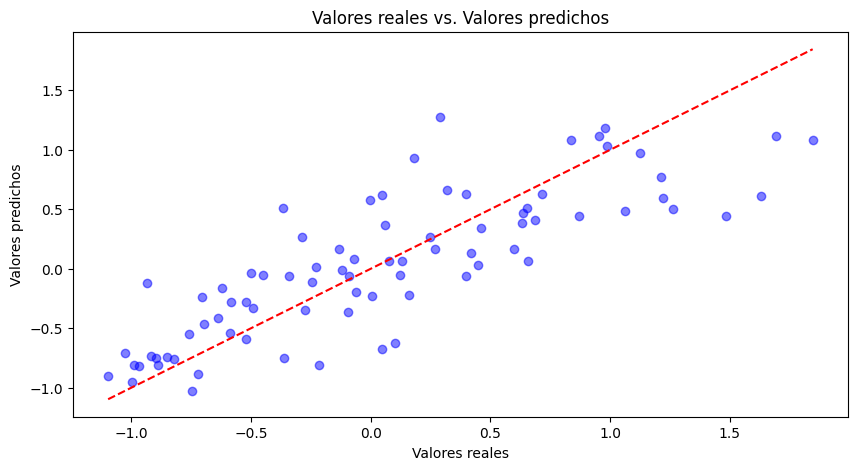

In [42]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(),
         y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
plt.show()